# En el presente script veremos como cargar el modelo ya entrenado para poder usarlo y hacer predicciones

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

# libreria para codificar labels como arreglos 1D
from tensorflow.keras.utils import to_categorical

# librería para poder trabajar con modelos:
from tensorflow.keras import models

# base de datos de imagenes de articulos de moda
from tensorflow.keras.datasets import fashion_mnist

# Librería para separar datos:
from sklearn.model_selection import train_test_split

## Cargamos datos de entrenamiento y pruebas:

In [13]:
# cargamos los datos:
(train_data, train_labels), (complement_train_data, complement_train_labels) = fashion_mnist.load_data()

# subdividimos el complemento de los datos de entrenamiento 
# para extraer datos de 'test' y 'validation' 

#  -Datos de entrenamiento: 100% de los datos de entrenamiento
#  -Datos de validation: 50% del complemento de entrenamiento
#  -Datos de test:       50% del complemento de entrenamiento

#p_train = 0.8 # porcentaje de datos de entrenamiento
p_validation=0.5  # porcentaje de datos de validación
p_test=0.5 # porcentaje de datos de pruebas

validation_data, test_data, validation_labels, test_labels = train_test_split (complement_train_data, complement_train_labels, test_size=p_validation, train_size=p_test, random_state=42)

In [14]:
# Imprimimos dimensiones:
print('\nLas dimensiones de los datos de entrenamiento son: ', train_data.shape)
print('Las dimensiones de los labels de entrenamiento son: ', train_labels.shape)

print('\nLas dimensiones de los datos de validación son: ', validation_data.shape)
print('Las dimensiones de los labels de validación son: ', validation_labels.shape)

print('\nLas dimensiones de los datos de prueba son: ', test_data.shape)
print('Las dimensiones de los labels de prueba son: ', test_labels.shape)


Las dimensiones de los datos de entrenamiento son:  (60000, 28, 28)
Las dimensiones de los labels de entrenamiento son:  (60000,)

Las dimensiones de los datos de validación son:  (5000, 28, 28)
Las dimensiones de los labels de validación son:  (5000,)

Las dimensiones de los datos de prueba son:  (5000, 28, 28)
Las dimensiones de los labels de prueba son:  (5000,)


In [15]:
# Las etiquetas toman valores enteros entre 0 y 9, es decir, hay 10 clases posibles
classes = np.unique(train_labels)
print('valores de las clases: ',classes)

n_clases = len(classes)
n_clases

valores de las clases:  [0 1 2 3 4 5 6 7 8 9]


10

In [16]:
# Definimos el nombre de las etiquetas:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Codificación de features (de entrenamiento, validación y pruebas) que pasarán por la red:

In [17]:
# Extraemos dimensiones de features de entrenamiento, validación y de prueba
s_a = train_data.shape
s_b = validation_data.shape
s_c = test_data.shape

# Codificamos los datos de entrenamiento, validación y de prueba que pasaran por la red
# (en vez de usar arreglos 3D de 'N x P x Q', usaremos arreglos 2D de 'N x P*Q' )
x_train = train_data.reshape((s_a[0],  s_a[1]*s_a[2]))
x_validation = validation_data.reshape((s_b[0],  s_b[1]*s_b[2]))
x_test = test_data.reshape((s_c[0],  s_c[1]*s_c[2]))

# normalizamos valores (dividiendo entre el máximo '255') para que los valores esten entre 0 y 1. 
# y los pasamos al tipo 'float32'
x_train = x_train.astype('float32')/255
x_validation = x_validation.astype('float32')/255
x_test = x_test.astype('float32')/255

## Codificación de labels (de entrenamiento, validación y pruebas) que se usaran como target para la red:

In [18]:
# Anteriormente vimos que hay 10 etiquetas distintas 'valores de las clases:  [0 1 2 3 4 5 6 7 8 9]'

# Debido a que entrenaremos la red usando la función de costo `loss='categorical_crossentropy'`

# debemos codificar las etiquetas de entrenamiento, validación y pruebas como vectores de datos categóricos:
# - 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# - 1 --> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# - 2 --> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# - 3 --> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# - 4 --> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# - 5 --> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# - 6 --> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# - 7 --> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# - 8 --> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# - 9 --> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

# Además debemos recordar que los valores de la función de activación en la capa de salida arrojará valores: {0,1}

y_train = to_categorical(train_labels)
y_validation = to_categorical(validation_labels)
y_test = to_categorical(test_labels)


print('Ejemplos de la codificación de etiquetas:')
print(train_labels[7],'--->',y_train[7])
print(train_labels[137],'--->',y_train[137])

Ejemplos de la codificación de etiquetas:
2 ---> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 ---> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Cargamos el modelo entrenado y lo usamos:

In [19]:
# Cargamos el modelo ya entrenado:
trained_model = models.load_model('modelo_entrenado_RNA1_FashionMnist.h5')

In [20]:
# visualzamos la arquitecura de la red:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 95,160
Trainable params: 95,160
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Una vez que hemos cargado el clasificador,
# lo aplicamos para generar etiquetas predichas:
y_predict = trained_model.predict(x_test)

y_predict.shape

(5000, 10)

### Cada etiqueta predicha por la red corresponde a un arreglo de tamaño 10.
### La posición del valor máximo de dicho arreglo corresponde al valor de la etiqueta predicha
### extraemos la posición del valor maximo usando `np.argmax`

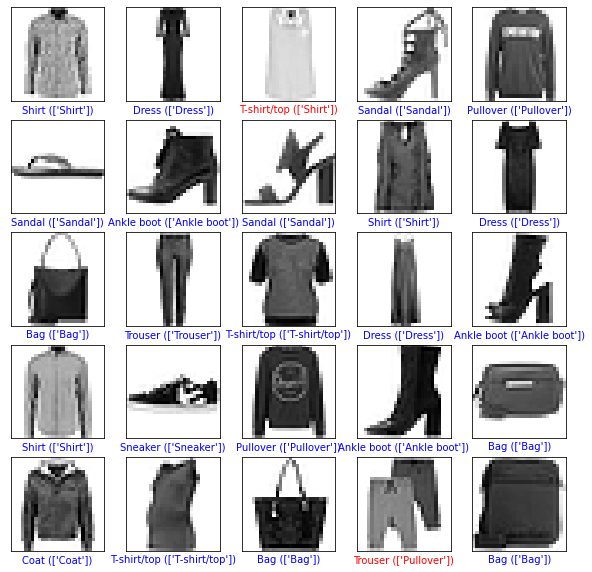

In [22]:
%matplotlib inline

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')   

    true_label = np.argmax( y_test[i] )    
    aprox_label = np.argmax( y_predict[i] )

    if true_label == aprox_label:
        col = 'blue'
    else:
        col = 'red'

    imagen = x_test[i,:].reshape(28,28)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel('{} ({})'.format( class_names[true_label], [class_names[aprox_label]]), color=col)